In [1]:
# import hypertools as hyp
from qmvpa import utils, factor, rsa
# from data_loader import load_cifar
from data_loader_local import load_data
from sklearn.model_selection import train_test_split
import os
import sys 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from dep.utils import subset_units
from itertools import product
# %matplotlib notebook
%matplotlib inline 
%autosave 5
sns.set(style = 'white', context='poster', rc={"lines.linewidth": 2.5})
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 16
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Autosaving every 5 seconds


In [4]:
# get roots 
log_root = '/tigress/qlu/logs/keras-resnet/log'
plt_root = '/tigress/qlu/logs/keras-resnet/plots'
pltdata_root = '/tigress/qlu/logs/keras-resnet/plots_data'

# define data name, model name 
data_name = 'cifar10'
model_name = 'resnet18'

# load data 
_, _, _, _, _, labels, data_info = load_data(data_name)
# _, _, _, _, _, labels, data_info = load_cifar(data_name)
[n_classes, img_rows, img_cols, img_channels] = data_info
n_test_egs = len(labels)

# define params 
n_subjs = 10
log_epochs = np.round(np.logspace(0,2,10))
log_epochs = np.insert(log_epochs, 0, 0).astype(int)
layer_selected = [2, 10, 17, 25, 32, 40, 47, 55, 62]
n_log_epochs = len(log_epochs)
n_layers = len(layer_selected)
print('log epochs', log_epochs)
print('layer selected', layer_selected)

log epochs [  0   1   2   3   5   8  13  22  36  60 100]
layer selected [2, 10, 17, 25, 32, 40, 47, 55, 62]


In [5]:
R_vals1 = np.zeros((n_layers, n_log_epochs))
P_vals1 = np.zeros((n_layers, n_log_epochs))
R_vals2 = np.zeros((n_layers, n_log_epochs))
P_vals2 = np.zeros((n_layers, n_log_epochs))

# i_l = -2
# i_e = -2

for i_l,i_e in product(range(n_layers), range(n_log_epochs)):
    # choose layer and epoch     
    l = layer_selected[i_l]
    e = log_epochs[i_e]

    # plot dir and plot data dir 
    plt_dir = os.path.join(
        plt_root, data_name, model_name, 
        'epoch_%.3d' % e, 'rsa')
    pltdata_dir = os.path.join(
        pltdata_root, data_name, model_name, 
        'epoch_%.3d' % e, 'rsa')

    # load RSA results 
    rsa_result_fname = 'wirsa_ns_l%.2d' % (l)
    rsa_result_path = os.path.join(pltdata_dir, rsa_result_fname)
    rsa_result_list = np.load(rsa_result_path + '.npy')

    [wRSM_n, iRSM_n, wRSM_s, iRSM_s] = rsa_result_list
    R_vals1[i_l, i_e], P_vals1[i_l, i_e] = rsa.correlate_2RSMs(wRSM_n, iRSM_s)
    R_vals2[i_l, i_e], P_vals2[i_l, i_e] = rsa.correlate_2RSMs(wRSM_n, iRSM_n)

In [8]:
sns.set(style = 'white', context='poster', rc={"lines.linewidth": 2.5}, font_scale=1)

Text(0.5,59,'Inter-subject corr.')

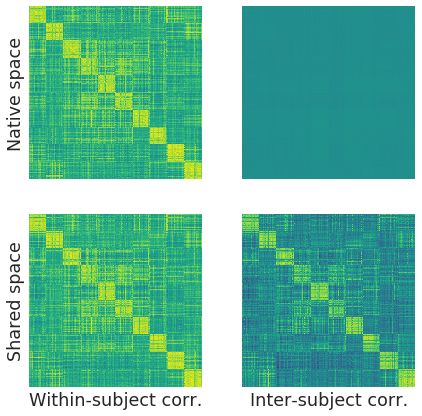

In [9]:
# plot 
val_min = -1 
val_max = 1

# compare 4 RDMs
f, axes = plt.subplots(2,2, figsize = (7, 7))
sns.heatmap(wRSM_n, 
            vmin=val_min, vmax=val_max, cbar=False,
            xticklabels= False, yticklabels=False,    
            square = True, cmap='viridis', ax = axes[0,0])
sns.heatmap(iRSM_n, 
            vmin=val_min, vmax=val_max, cbar=False,
            xticklabels= False, yticklabels=False,    
            square = True, cmap='viridis', ax = axes[0,1])
sns.heatmap(wRSM_s, 
            vmin=val_min, vmax=val_max, cbar=False, 
            xticklabels= False, yticklabels=False,    
            square = True, cmap='viridis', ax = axes[1,0])
sns.heatmap(iRSM_s, 
            vmin=val_min, vmax=val_max, cbar=False,
            xticklabels= False, yticklabels=False,    
            square = True, cmap='viridis', ax = axes[1,1])

axes[0,0].set_ylabel('Native space')
axes[1,0].set_ylabel('Shared space')
axes[1,0].set_xlabel('Within-subject corr.')
axes[1,1].set_xlabel('Inter-subject corr.')
# f.suptitle('Representational similarity matrix',y=1.02)
# f.suptitle('Representational similarity matrix, layer %d' % l, y=1.02)
# f.tight_layout()

# # save plot 
# fig_name = 'wirsa_ns_l%.2d' % l 
# fig_spath = os.path.join(plt_dir, fig_name)
# f.savefig(fig_spath)